1. Core - Net

        1.1.Import details
        1.2 Functions
        1.3 FC layer example
        1.4 Network Visualizer
        1.5 Running a network if created using Core - Net
    

2. General Helpers
    
        2.1 Functions
    

3. General Model Helpers

        3.1 Import details
        3.2 Functions in Model Helpers
        3.3 Assistive Funcationalities of Model Helpers
        3.4 FC Layer example 
        3.4 Creating Network using Model Helpers
        
        
4. Brew

        4.1 Import details
        4.2 Supported operators in brew
        4.3 Why brew?
        4.4 Creating Network using brew and observing the difference
        
        
5. CNN Model Helpers

        5.1 Import details
        5.2 Supported operators in brew
        5.3 Where to use CNN Model Helpers?
        5.4 Creating Network using CNN Model Helpers and observing the difference


6. Explaining - Assistive Funcationalities of Model Helpers

        6.1 Creating an outer shell (A Protobuf Object) which can hold the all necessary objects. 
        6.2 Adding input data blobs
        6.3 Adding network  
        6.4 Adding Training Parameters
        6.5 Logging Network Summaries
        6.6 Initializing network parameters
        6.7 Training a network


7. Sample Data Downloading and arrangement 

In [1]:
# Import required libraries

from matplotlib import pyplot
import numpy as np
import os
import shutil
import caffe2.python.predictor.predictor_exporter as pe


from caffe2.python import (
    brew,
    core,
    model_helper,
    net_drawer,
    optimizer,
    visualize,
    workspace,
    cnn,
)
from IPython.display import Markdown
from IPython.display import Image

# If you would like to see some really detailed initializations,
# you can change --caffe2_log_level=0 to --caffe2_log_level=-1
core.GlobalInit(['caffe2', '--caffe2_log_level=0'])

def printmd(string):
    display(Markdown(string))

printmd("**Necessities imported!**")


**Necessities imported!**

# 1. Core - NET

The base net creator. Even though we won't be using this class directly for network creations, we have listed a few functions and methodologies you need to be aware of when building nets using model_helpers or brew.

To get more details refer to the file: https://github.com/caffe2/caffe2/blob/master/caffe2/python/core.py

### 1.1 Import Details

Imports net_builder base from caffe2.python module

### 1.2 Functions

1) Core.Net -> Creates an empty network with the name provided as argument

2) Proto -> Printing network as a structured function

3) Net.SomeOperator -> All the Operators, Layers, Fillers, Initializers, Optimizers can be stacked together using Net.SomeOperator funcationalities 

4) AppendNet -> Appends network with another net

5) BlobIsDefined -> Returns True if Network has a certain Blob. Pass the BlobReference as argument.

6) UsedBlobNames -> Returns list of blob names used the net 

7) Clone -> Clones network

Lets examine a few of such functions.

In [2]:
#########################################################################################################
printmd("**1) Core.Net Function**")
#Creating an empty net
net1 = core.Net("first_net")
net2 = core.Net("second_net")
print "Nets created using: ", "net = core.Net(\"net_name\") statement"
#########################################################################################################

**1) Core.Net Function**

Nets created using:  net = core.Net("net_name") statement


In [3]:
#########################################################################################################
printmd("**2) Proto Function**")
print("First network proto:\n\n{}".format(net1.Proto()))
print("Second network proto:\n\n{}".format(net2.Proto()))
#########################################################################################################

#########################################################################################################
printmd("**3) Net.SomeOperator**")
#Adding an operator to first net
X = net1.GaussianFill([], ["X"], mean=0.0, std=1.0, shape=[2, 3], run_once=0)
Y = net2.GaussianFill([], ["Y"], mean=1.0, std=3.0, shape=[6, 9], run_once=0)
print("First network proto:\n\n{}".format(net1.Proto()))
print("Second network proto:\n\n{}".format(net2.Proto()))
print ("Added Gaussian Filler to the nets")
printmd("**A completes list of functions of net -> Operators, Layers, Fillers, Initializers, Optimizers**")
print(dir(net1))
#########################################################################################################

**2) Proto Function**

First network proto:

name: "first_net"

Second network proto:

name: "second_net"



**3) Net.SomeOperator**

First network proto:

name: "first_net"
op {
  output: "X"
  name: ""
  type: "GaussianFill"
  arg {
    name: "std"
    f: 1.0
  }
  arg {
    name: "run_once"
    i: 0
  }
  arg {
    name: "shape"
    ints: 2
    ints: 3
  }
  arg {
    name: "mean"
    f: 0.0
  }
}

Second network proto:

name: "second_net"
op {
  output: "Y"
  name: ""
  type: "GaussianFill"
  arg {
    name: "std"
    f: 3.0
  }
  arg {
    name: "run_once"
    i: 0
  }
  arg {
    name: "shape"
    ints: 6
    ints: 9
  }
  arg {
    name: "mean"
    f: 1.0
  }
}

Added Gaussian Filler to the nets


**A completes list of functions of net -> Operators, Layers, Fillers, Initializers, Optimizers**

[u'APMeter', u'Abs', u'AbsGradient', u'Accumulate', u'AccumulateHistogram', u'Accuracy', u'Adagrad', u'Adam', u'Add', 'AddExternalInput', 'AddExternalInputs', 'AddExternalOutput', 'AddExternalOutputs', 'AddGradientOperators', 'AddObserver', u'AddPadding', 'AddScopedExternalInputs', 'AddScopedExternalOutputs', u'Alias', u'Allgather', u'Allreduce', u'And', u'Append', 'AppendNet', 'AppendOutputRecordField', u'Assert', u'AtomicAppend', u'AtomicFetchAdd', u'AtomicIter', u'AveragePool', u'AveragePool1D', u'AveragePool1DGradient', u'AveragePool2D', u'AveragePool2DGradient', u'AveragePool3D', u'AveragePool3DGradient', u'AveragePoolGradient', u'AveragedLoss', u'AveragedLossGradient', u'BBoxTransform', u'BRGNCHWCToPackedInt8BGRAStylizerDeprocess', u'Barrier', u'BatchBoxCox', u'BatchBucketOneHot', u'BatchDenseToSparse', u'BatchGather', u'BatchGatherGradient', u'BatchMatMul', u'BatchOneHot', u'BatchSparseToDense', u'BatchToSpace', 'BlobIsDefined', u'BooleanMask', u'BooleanMaskLengths', u'BooleanUn

In [4]:
#########################################################################################################
printmd("**4) AppendNet**")
net1 = net1.AppendNet(net2)
print("Appended network proto:\n\n{}".format(net1.Proto()))
print ("Added net2 to net1")
#########################################################################################################

**4) AppendNet**

Appended network proto:

name: "first_net"
op {
  output: "X"
  name: ""
  type: "GaussianFill"
  arg {
    name: "std"
    f: 1.0
  }
  arg {
    name: "run_once"
    i: 0
  }
  arg {
    name: "shape"
    ints: 2
    ints: 3
  }
  arg {
    name: "mean"
    f: 0.0
  }
}
op {
  output: "Y"
  name: ""
  type: "GaussianFill"
  arg {
    name: "std"
    f: 3.0
  }
  arg {
    name: "run_once"
    i: 0
  }
  arg {
    name: "shape"
    ints: 6
    ints: 9
  }
  arg {
    name: "mean"
    f: 1.0
  }
}

Added net2 to net1


In [5]:
#########################################################################################################
printmd("**5) BlobIsDefined**")
print "Net1 has blob X: ", net1.BlobIsDefined("X")
print "Net1 has blob Z: ", net1.BlobIsDefined("Z")
print("Function BlobIsDefined Tested")
#########################################################################################################

#########################################################################################################
printmd("**6) BlobIsDefined**")
print "Net1 has blobs: ", net1.UsedBlobNames()
print("Function UsedBlobNames Tested")
#########################################################################################################


#########################################################################################################
printmd("**6) Clone**")
net3 = net1.Clone("third_network")
print("Cloned network net3 proto:\n\n{}".format(net3.Proto()))
print("Function Clone Tested")
#########################################################################################################

**5) BlobIsDefined**

Net1 has blob X:  True
Net1 has blob Z:  False
Function BlobIsDefined Tested


**6) BlobIsDefined**

Net1 has blobs:  set([u'Y', u'X'])
Function UsedBlobNames Tested


**6) Clone**

Cloned network net3 proto:

name: "third_network"
op {
  output: "X"
  name: ""
  type: "GaussianFill"
  arg {
    name: "std"
    f: 1.0
  }
  arg {
    name: "run_once"
    i: 0
  }
  arg {
    name: "shape"
    ints: 2
    ints: 3
  }
  arg {
    name: "mean"
    f: 0.0
  }
}
op {
  output: "Y"
  name: ""
  type: "GaussianFill"
  arg {
    name: "std"
    f: 3.0
  }
  arg {
    name: "run_once"
    i: 0
  }
  arg {
    name: "shape"
    ints: 6
    ints: 9
  }
  arg {
    name: "mean"
    f: 1.0
  }
}

Function Clone Tested


### 1.3. Simple FC Layer using Core.Net Operator

Below is an example of creating a **Fully Connected Layer** of CNN. The intricate details of the layer will be dealt in detail during the upcoming sections of the course. 

To create a just a simple fully functional FC Layer using core.Net one has to write **several lines of code**, this is the reason model_helpers were created and why we **won't** be using core.Net directly in our course.

In [6]:
#Adopted from: https://caffe2.ai/docs/tutorial-basics-of-caffe2.html
workspace.ResetWorkspace()
network = core.Net("sample_fc_layer")
X = network.GaussianFill([], ["X"], mean=0.0, std=1.0, shape=[2, 3], run_once=0)
W = network.GaussianFill([], ["W"], mean=0.0, std=1.0, shape=[5, 3], run_once=0)
b = network.ConstantFill([], ["b"], shape=[5,], value=1.0, run_once=0)

Y = X.FC([W, b], ["Y"]) #Here X becomes the input to Y with W, b as weights and biases.
print("Current network proto:\n\n{}".format(network.Proto()))

Current network proto:

name: "sample_fc_layer"
op {
  output: "X"
  name: ""
  type: "GaussianFill"
  arg {
    name: "std"
    f: 1.0
  }
  arg {
    name: "run_once"
    i: 0
  }
  arg {
    name: "shape"
    ints: 2
    ints: 3
  }
  arg {
    name: "mean"
    f: 0.0
  }
}
op {
  output: "W"
  name: ""
  type: "GaussianFill"
  arg {
    name: "std"
    f: 1.0
  }
  arg {
    name: "run_once"
    i: 0
  }
  arg {
    name: "shape"
    ints: 5
    ints: 3
  }
  arg {
    name: "mean"
    f: 0.0
  }
}
op {
  output: "b"
  name: ""
  type: "ConstantFill"
  arg {
    name: "run_once"
    i: 0
  }
  arg {
    name: "shape"
    ints: 5
  }
  arg {
    name: "value"
    f: 1.0
  }
}
op {
  input: "X"
  input: "W"
  input: "b"
  output: "Y"
  name: ""
  type: "FC"
}



### 1.4. Network Drawer

It is a common practice in Deep Learning to visualize network architectures.

Here in caffe2, it is done using the net_drawer function which takes in the protobuf network object and converts into readable image formats

In our case, lets vidualize the FC layer created above

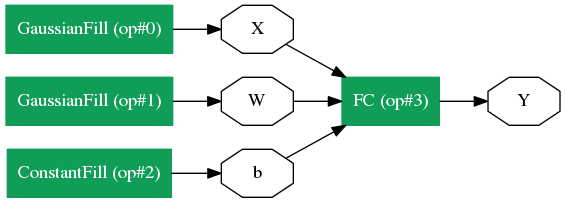

In [7]:
graph = net_drawer.GetPydotGraph(network, rankdir="LR")
Image(graph.create_png(), width=800)

### 1.5. Running a network if created using core-net

If a network is created using core.Net the usual steps to run the network are

1) Create the network architecture

2) Add Gradient to each operator/layer (To ensure backpropragation)

3) Add Optimizers and other hyperparameters

4) Initialize the network weights and biases using workspace.RunNetworkOnce() 

5) Create a runnable network using workspace.CreateNet()

6) Run the created network for a required number of iterations using workspace.RunNet()


We will demonstrate a sample run for the FC layer created above. We **wont** add gradient Ops.


In [8]:
printmd("**Running the network created using core.Net**")
workspace.ResetWorkspace()

workspace.RunNetOnce(network)
print("Initialized Blobs in the workspace after execution: {}".format(workspace.Blobs()))
for name in workspace.Blobs():
    print("{}:\n{}".format(name, workspace.FetchBlob(name)))

print "\n"
print "\n"

workspace.CreateNet(network)
#Running for 1000 iterations
for i in range(1000): 
    workspace.RunNet(network.Proto().name)
print("Blobs in the workspace after complete execution: {}".format(workspace.Blobs()))
for name in workspace.Blobs():
    print("{}:\n{}".format(name, workspace.FetchBlob(name)))
print "\n"
print "\n"
print "Sample demo for running the network created using core.Net complete"

**Running the network created using core.Net**

Initialized Blobs in the workspace after execution: [u'W', u'X', u'Y', u'b']
W:
[[ 0.2859182  -3.093014   -1.1752913 ]
 [ 0.18659304 -0.02438713  0.9217288 ]
 [-0.01841062 -1.6355196  -0.20877817]
 [ 0.6162049  -1.0640212  -0.96673346]
 [ 0.04988097  0.06246159 -0.09283951]]
X:
[[ 2.05487     0.19210097  0.2937338 ]
 [-0.07072681  0.30044422  0.22667103]]
Y:
[[ 0.64813095  1.6494825   0.5866585   1.7778592   1.0872277 ]
 [-0.21590471  1.1884052   0.46259576  0.41760832  0.99419427]]
b:
[1. 1. 1. 1. 1.]




Blobs in the workspace after complete execution: [u'W', u'X', u'Y', u'b']
W:
[[ 0.88971484 -0.36625662  0.33271927]
 [-0.30997086 -1.8750341   0.41151717]
 [-0.4214546  -0.29120263  0.19554885]
 [-0.7867059  -0.5540945   1.5522885 ]
 [ 0.6641489   0.770698   -0.18224156]]
X:
[[ 0.08811291 -0.630764   -0.18251295]
 [ 0.55267256  0.5101973  -0.07348192]]
Y:
[[ 1.2486913   2.0802844   1.1108544   0.9968711   0.605653  ]
 [ 1.280409   -0.15818882  0.6041335   0.16844654  1.7736564 ]]
b:


# 2. General Helpers

These are the genral helper functions caffe2 has in order to facilitate non-network related operations

To get more details on the file refer to: https://github.com/caffe2/caffe2/blob/master/caffe2/python/tutorials/helpers.py

Created for tutorial purposes and serves the functions of loading and transforming image data

### 2.1. Functions 
The functions involved in it are:

1) load -> Load image using scikit. To know more about scikit vist: http://scikit-image.org/

2) bgr -> Convert rgb image to bgr

3) chw -> Arrangement(height, width, channel) to Arrangment(channel, height, width)

4) crop_center -> Using center of image to crop it using specified height and width

5) rescale -> Changing image resolution

6) load to NCHW -> Load image, Rescale, Crop, Apply chw, apply bgr, apply mean_subtraction, and add a new dimension to enable loading onto caffe. N-> Batch size, C->Channels, H->Height, W->Width

Let's take up a few helper functions

In [9]:
from caffe2.python.tutorials import helpers

img = helpers.load("images/test.jpeg")
print "Loaded image shape: ", img.shape

img = helpers.rescale(img, 100, 150)
print "Rescaled image shape: ", img.shape

img = helpers.chw(img)
print "Transformed shape: ", img.shape

printmd("**Study the base helpers python file and apply more functions onto your test images**")

Loaded image shape:  (2988, 5312, 3)


/home/abhi/.virtualenvs/caffe2_test/local/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Rescaled image shape:  (150, 177, 3)
Transformed shape:  (3, 150, 177)


**Study the base helpers python file and apply more functions onto your test images**

# 3. General Model Helper

The standard helper module that is used to manage, train and test networks.

### 3.1 Import Details
It is a wrapper on top of 

1) caffe2.python Core -> In turn, it automatically imports all the basic functions of caffe2.python.Core.Net

2) caffe2.python Helpers -> This folder, https://github.com/caffe2/caffe2/tree/master/caffe2/python/helpers, contains 
        
        2.1 Basic algebraic functions
        2.2 Non-linear activation functions
        2.3 Base CNN layers
        2.4 Training helper functions
        
3) caffe2.python Modelling -> This folder, https://github.com/caffe2/caffe2/tree/master/caffe2/python/modeling, contains
        
        3.1 Initializers
        3.2 Parameter Info Reader Helper Function
        
4) caffe2.python Regularizers

### 3.2. Functions

At present (as for 27th March, 2018), the **functions that model_helper incorporates** are

1) Base Layers:

        1.1 Flatten
        1.2 MatMul
        1.3 Squeeze
        1.4 Transpose
        1.5 FlattenToVec
    

2) Optimizers
    
        2.1 Adam
        2.2 Adagrad
        2.3 SparseAdagrad
        2.4 YellowFin
 

3) Fillers
    
        3.1 ConstantFill

4) Activation Functions

        4.1 Add
        4.2 NCCLAllreduce
        4.3 PRelu
        4.4 Scale
        4.5 Sigmoid
        4.6 Softmax
        4.7 TanH


5) General Functions

        5.1 Accuracy
        5.2 Cast
        5.3 Checkpoint
        5.4 Copy
        5.5 CopuGPUToCPU
        5.6 CopyCPUToGPU
        5.7 DequeueBlobs
        5.8 EnsureCPUOutput
        5.9 ExpandDims
        5.10 LearningRate
        5.11 MakeTwoClass
        5.12 NHWC2NCHW
        5.13 PackSegments
        5.14 Print
        5.15 StopGradient
        5.16 Summarize
        5.17 UnpackSegments
        

6) Loss and Reduce functions

        6.1 AveragedLoss
        6.2 LabelCrossEntropy
        6.3 ScatterWeightedSum
        6.4 SortedSegmentSum
        6.5 SoftmaxWithLoss
        6.6 SquaredL2Distance
        6.7 WeightedSum
        6.8 ReduceFrontSum



7) Training/Testing helper functions

        7.1 AddGradientOperators -> Enable backpropagation with loss
        7.2 AddParameter -> Add parameteres to monitors during training
        7.3 GetAllParams & GetComputedParams
        7.4 GetDevices -> Get Devices on which the net will run
        7.5 GetOptimizationParamInfo & GetParams
        7.6 Proto -> For getting summary of network
        7.7 TensorProtosDBInput -> Loading and transforming data as input layer onto DB


8) model_helpers had **net** functionality, which is the wrapper onto caffe2.python.Core.Net module.

**Note: All the above will be studies in detail during the later sections of this course**

### 3.3. Assistive Funcationalities of Model Helpers

**The main functionalities of model_helper are**:

1) Creating an outer shell (A Protobuf Object) which can hold the all necessary objects. 

2) Holding input data blobs

3) Holding network objects created using Core.Net, model_helper.net, or Brew, or CNN Model Helpers.  

4) Holding Training Parameters such as Loss, Accuracies, Optimizers.

5) Logging Network Summaries

6) Helping workspace to initialize network parameters

7) Helping workspace to create a trainable network.

8) Helping workspace to validate and test a trained network

Below Is an example of how model_helpers facilitates the 8 functions mentioned above. 

**Note: Please ignore the intracate functions used to demonstrate the steps mentioned above**

This will be studied at a later point in this notebook this notebook. Refer to the section: Explaining - Assistive Funcationalities of Model Helpers

### 3.4 FC Layer using Model Helpers

Lets create a simple FC Layer using Model Helper as we did using core.Net

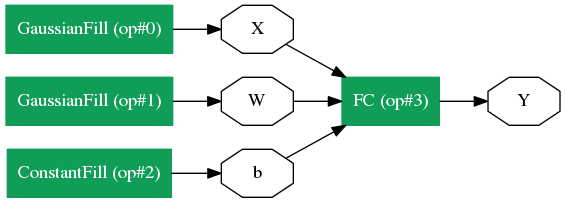

In [10]:
arg_scope = {"order": "NCHW"}
train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
X = train_model.net.GaussianFill([],'X', mean=0.0, std=1.0, shape=[2, 3])
W = train_model.net.GaussianFill([],'W',  mean=0.0, std=1.0, shape=[5, 3])
b = train_model.net.ConstantFill([],'b', shape=[5,], value=1.0)
Y = train_model.net.FC(['X', 'W', 'b'], 'Y', dim_in=50 * 4 * 4, dim_out=500)

graph = net_drawer.GetPydotGraph(train_model, rankdir="LR")
Image(graph.create_png(), width=800)

### 3.5. CNN using Model Helper

Model Helper acts as **a wrapper on top of Core.Net**.

The Operators that model_helper.ModelHelper.net supports (as of 27th March 2018) include all the sub-functions that core.Net module has.

**Note: Each of the supported operator, layer, optimizer, loss function, will be discussed in detail in later sections of this course** 

Lets create a sample CNN network usong model_helpers

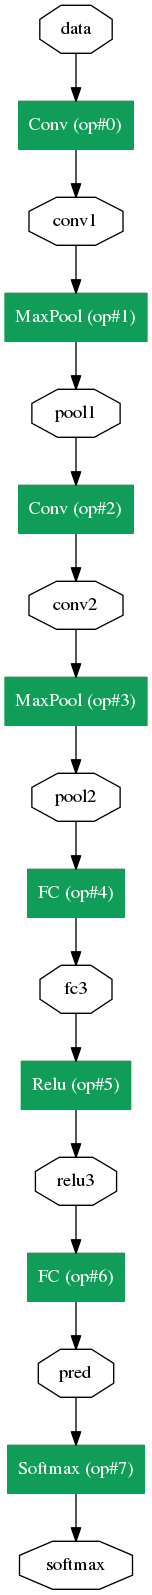

In [11]:
# At this stage you may ignore what convolution or pooling means
train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
conv1 = train_model.net.Conv('data', 'conv1', dim_in=1, dim_out=20, kernel=5)
pool1 = train_model.net.MaxPool(conv1, 'pool1', kernel=2, stride=2)
conv2 = train_model.net.Conv(pool1, 'conv2', dim_in=20, dim_out=50, kernel=5)
pool2 = train_model.net.MaxPool(conv2, 'pool2', kernel=2, stride=2)
fc3 = train_model.net.FC(pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500)
fc3 = train_model.net.Relu(fc3, 'relu3')
pred = train_model.net.FC(fc3, 'pred', dim_in=500, dim_out=10)
softmax = train_model.net.Softmax(pred, 'softmax')

graph = net_drawer.GetPydotGraph(train_model, rankdir="TD")
Image(graph.create_png())

# 4. Brew

Those who are aware of Keras Library would easily understand why caffe2 opted to create Brew module. It's major functionality to ease the process of network creation and management.

For more intricate details refer to: https://github.com/caffe2/caffe2/blob/master/caffe2/python/brew.py

**Note: Brew is still in development phase, so not all operators are supported by brew**

### 4.1. Import Details

The two major imports that brew makes are

1) The entire caffe2.python.model_helpers module

2) caffe2.python Helpers -> This folder, https://github.com/caffe2/caffe2/tree/master/caffe2/python/helpers, contains

Brew can be imported from **caffe2.python** module

### 4.2 Supported Operators

At present (As per 27th March 2018), Brew supports the following functions

1) Base Layers:

        1.1 fc
        1.2 packed_fc
        1.3 fc_decomp
        1.4 fc_sparse
        1.5 fc_prune
        1.6 dropout
        1.7 max_pool
        1.8 average_pool
        1.9 max_pool_with_index
        1.10 lrn
        1.11 instance_norm
        1.12 spatial_bn
        1.13 concat
        1.14 depth_concat
        1.15 transpose
        1.16 conv
        1.17 conv_nd
        1.18 conv_transpose
        1.19 group_conv
        1.20 group_conv_deprecated
        1.21 elementwise_linear
        1.22 layer_norm
        1.23 batch_mat_mul
        
    

2) Optimizers
    
        None
 

3) Fillers
    
        None
        

4) Activation Functions

        4.1 softmax
        4.2 relu
        4.3 prelu
        4.4 tanh
        

5) General Functions

        5.1 arg_scope
        5.2 sum
        5.3 image_input
        5.4 video_input
        5.5 cond
        5.6 loop
        5.7 db_input        
        

6) Loss and Reduce functions

        None


7) Training/Testing helper functions

        7.1 iter
        7.2 accuracy
        7.3 add_weight_decay
        


**Note: All the above will be studies in detail during the later sections of this course**
       
      
        '        
        
        
        
        

### 4.3 Why Brew?

**IF compared to model_helpers**, at present stage of development, Brew provides assistance in creating the network rather than managing and training it.

While creating networks, weight initialization is a crucial part (Will be discussed in detail in our course). IF created using model_helpers it takes several lines of code to add initial weights.

But when using brew, it is handled by the wrapper itself. See the example below:

In [12]:
# Adopted from: https://caffe2.ai/docs/brew.html

dim_in=10
dim_out=20

# Using model helpers
model_h = model_helper.ModelHelper(name="train")
weights = model_h.param_init_net.XavierFill(
    [],
    'FC_h' + '_w',
    shape=[dim_out, dim_in]
)
bias = model_h.param_init_net.ConstantFill(
    [],
    'FC_h' + '_b',
    shape=[dim_out, ]
)
FC_h = model_h.net.FC(['data', weights, bias], 'FC_h', dim_in=dim_in, dim_out=dim_out)


# Using brew
model_b = model_helper.ModelHelper(name="train")
FC_Brew = brew.fc(model_b, 'data', 'fc_h', weight_init=('XavierFill', {}), \
                  bias_init=('XavierFill', {}), dim_in=dim_in, dim_out=dim_out)

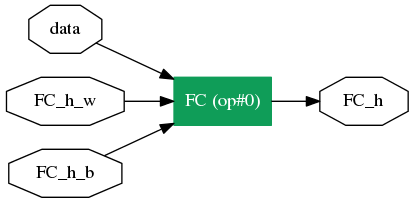

In [13]:
# The model_helpers one
graph = net_drawer.GetPydotGraph(model_h, rankdir="LR")
Image(graph.create_png(), width=800)

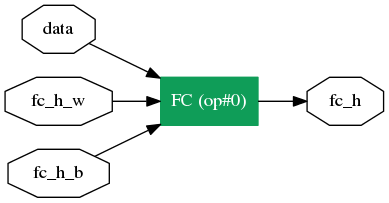

In [14]:
# The brew one
graph = net_drawer.GetPydotGraph(model_b, rankdir="LR")
Image(graph.create_png(), width=800)

### Why brew? - Continued

Also, by using ArgScope we can add the repetitive parameters onto the scope, parameters such as Initializers, and create the network under the same scope. 

As the course progresses, we will keep using ArgScope in the later sections of the course.

### 4.4 Creating Network using brew and observing the difference

Earlier we created a CNN network using model_helpers, lets repeat the same using brew.

As you will see, the difference would be, initialization will be done here for each layer unlike simple model_helpers. 

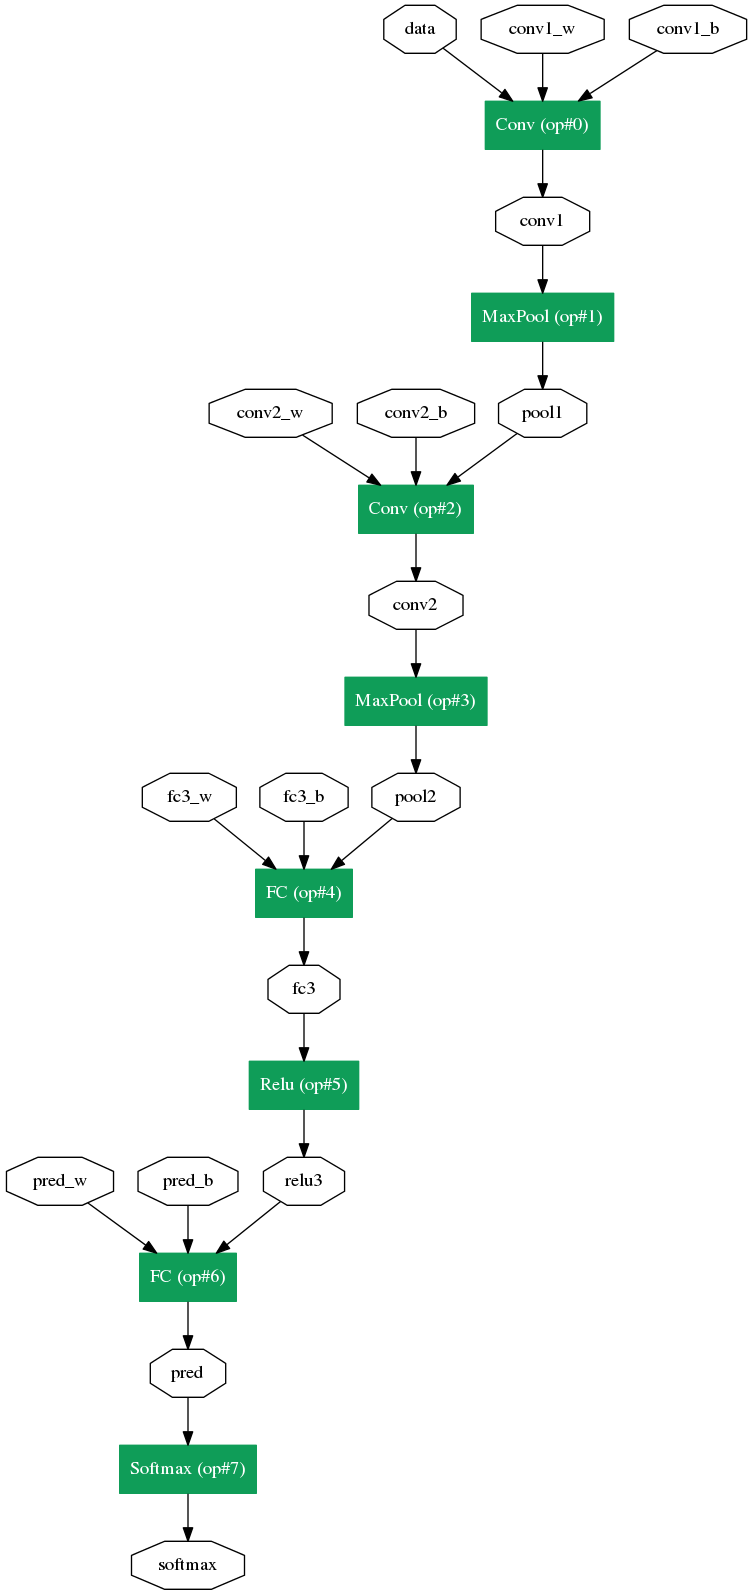

In [15]:
# At this stage you may ignore what convolution or pooling means
train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
conv1 = brew.conv(train_model, 'data', 'conv1', dim_in=1, dim_out=20, kernel=5)
pool1 = brew.max_pool(train_model, conv1, 'pool1', kernel=2, stride=2)
conv2 = brew.conv(train_model, pool1, 'conv2', dim_in=20, dim_out=50, kernel=5)
pool2 = brew.max_pool(train_model, conv2, 'pool2', kernel=2, stride=2)
fc3 = brew.fc(train_model, pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500)
fc3 = brew.relu(train_model, fc3, 'relu3')
pred = brew.fc(train_model, fc3, 'pred', dim_in=500, dim_out=10)
softmax = brew.softmax(train_model, pred, 'softmax')

graph = net_drawer.GetPydotGraph(train_model, rankdir="TD")
Image(graph.create_png())

# 5. CNN Model Helpers

Those who are aware of Keras Library would easily understand why caffe2 opted to create CNN Model Helpers module. It's major functionality was to ease the process of network creation and management.

It is a combination of General Model Helpers and Brew.

For more intricate details refer to: https://github.com/caffe2/caffe2/blob/master/caffe2/python/cnn.py

Note: CNN Model Helpers at later stages wil be removed and in place Brew will be used.

### 5.1. Import Details

The two major imports that brew makes are

1) The entire caffe2.python.model_helpers module

2) caffe2.python Helpers -> This folder, https://github.com/caffe2/caffe2/tree/master/caffe2/python/helpers, contains

3) The entire caffe2.python.brew

CNN Model Helper can be imported from **caffe2.python** module

### 5.2 Supported Operators

At present (As per 27th March 2018), Brew supports the following functions

1) Base Layers:

        1.1 fc
        1.2 packed_fc
        1.3 fc_decomp
        1.4 fc_sparse
        1.5 fc_prune
        1.6 dropout
        1.7 max_pool
        1.8 average_pool
        1.9 max_pool_with_index
        1.10 lrn
        1.11 instance_norm
        1.12 spatial_bn
        1.13 concat
        1.14 depth_concat
        1.15 transpose
        1.16 conv
        1.17 conv_nd
        1.18 conv_transpose
        1.19 group_conv
        1.20 group_conv_deprecated
        1.21 elementwise_linear
        1.22 layer_norm
        1.23 batch_mat_mul
        
    

2) Optimizers
    
        2.1 Adam
        2.2 Adagrad
        
 

3) Fillers
    
        3.1 ConstantFill
        

4) Activation Functions

        4.1 softmax
        4.2 relu
        4.3 prelu
        4.4 tanh
        

5) General Functions

        5.1 arg_scope
        5.2 sum
        5.3 image_input
        5.4 video_input
        5.5 cond
        5.6 loop
        5.7 db_input
        5.8 Accuracy
        5.9 CopyCPUToGPU
        

6) Loss and Reduce functions

        6.1 AveragedLoss
        


7) Training/Testing helper functions

        7.1 iter
        7.2 accuracy
        7.3 add_weight_decay
        7.4 AddGradientOperators
        7.5 AddParameter
        7.6 AddWeightDecay
        7.7 Checkpoint




**Note: All the above will be studies in detail during the later sections of this course**
       

### 5.3 Creating Network using CNN Model Helpers and observing the difference

Earlier we created a CNN network using model_helpers, and brew lets repeat the same using CNN Model Helpers.

As you will see, the difference would be, initialization will be done here for each layer unlike simple model_helpers.

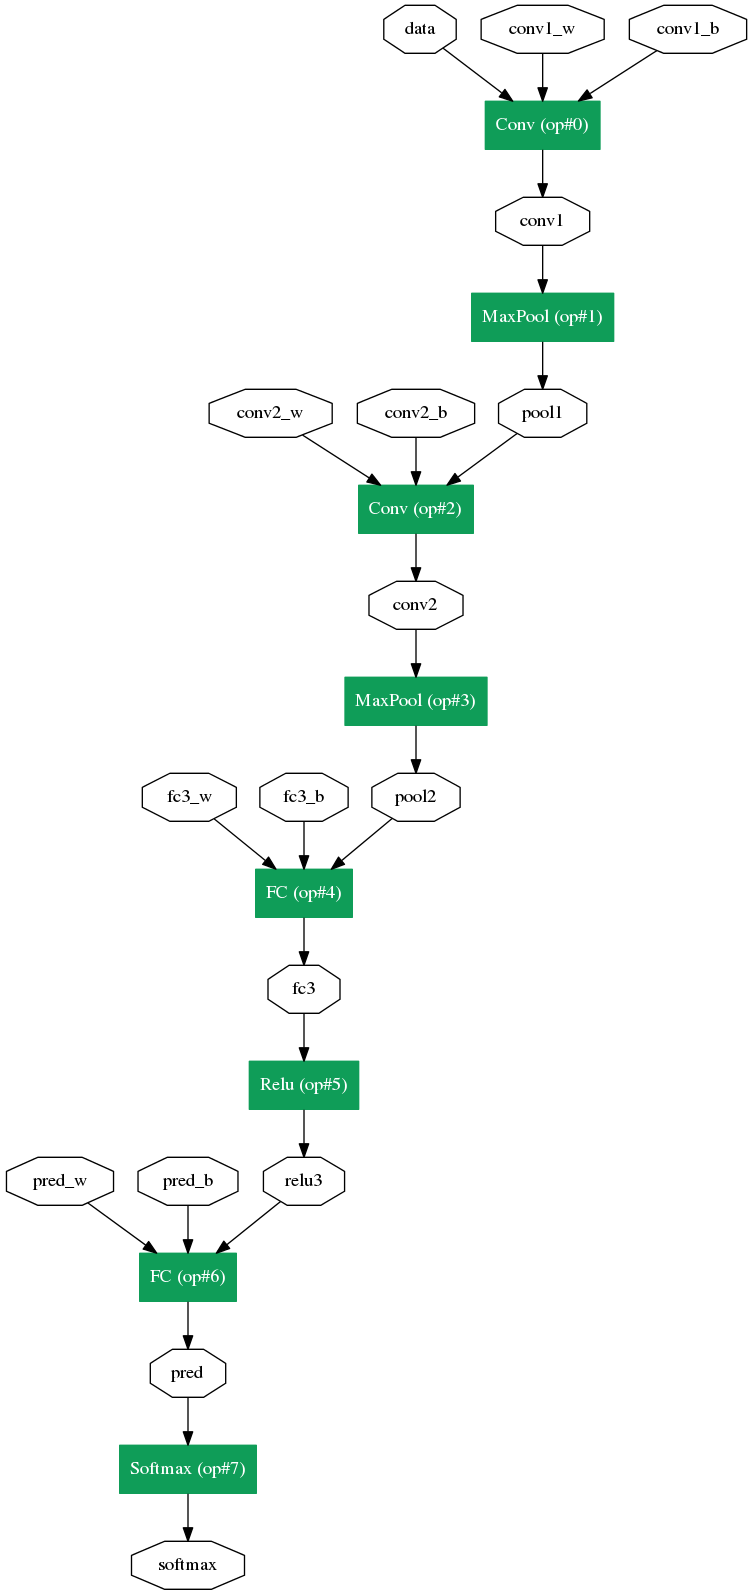

In [16]:
# At this stage you may ignore what convolution or pooling means
train_model = cnn.CNNModelHelper(name="mnist_train")
conv1 = train_model.Conv('data', 'conv1', dim_in=1, dim_out=20, kernel=5)
pool1 = train_model.MaxPool(conv1, 'pool1', kernel=2, stride=2)
conv2 = train_model.Conv(pool1, 'conv2', dim_in=20, dim_out=50, kernel=5)
pool2 = train_model.MaxPool(conv2, 'pool2', kernel=2, stride=2)
fc3 = train_model.FC(pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500)
fc3 = train_model.Relu(fc3, 'relu3')
pred = train_model.FC(fc3, 'pred', dim_in=500, dim_out=10)
softmax = train_model.Softmax(pred, 'softmax')

graph = net_drawer.GetPydotGraph(train_model, rankdir="TD")
Image(graph.create_png())

# 6. Explaining - Assistive Funcationalities of Model Helpers

**The main functionalities of model_helper are**:

1) Creating an outer shell (A Protobuf Object) which can hold the all necessary objects. 

2) Holding input data blobs

3) Holding network objects created using Core.Net, model_helper.net, or Brew, or CNN Model Helpers.  

4) Holding Training Parameters such as Loss, Accuracies, Optimizers.

5) Logging Network Summaries

6) Helping workspace to initialize network parameters

7) Helping workspace to create a trainable network.

8) Helping workspace to validate and test a trained network

Below Is an example of how model_helpers facilitates the 8 functions mentioned above. 

**Note: Please ignore the intracate functions used to demonstrate the steps mentioned above**

In [17]:
# Adopted from: https://caffe2.ai/docs/tutorial-MNIST.html

############################################################################################################
printmd("**Step1: Create an outer shell**")
arg_scope = {"order": "NCHW"}
train_model = model_helper.ModelHelper(name="mnist_train", arg_scope=arg_scope)
print "Outer shell object is: ", train_model
############################################################################################################

**Step1: Create an outer shell**

Outer shell object is:  <caffe2.python.model_helper.ModelHelper object at 0x7f4d21fc0090>


In [18]:
############################################################################################################
printmd("**Step2: Adding input blob data**")
def DownloadResource(url, path):
    '''Downloads resources from s3 by url and unzips them to the provided path'''
    import requests, zipfile, StringIO
    print("Downloading... {} to {}".format(url, path))
    r = requests.get(url, stream=True)
    z = zipfile.ZipFile(StringIO.StringIO(r.content))
    z.extractall(path)
    print("Completed download and extraction.")
current_folder = os.path.join(os.path.expanduser('~'), 'caffe2_notebooks')
data_folder = os.path.join(current_folder, 'tutorial_data', 'mnist')
root_folder = os.path.join(current_folder, 'tutorial_files', 'tutorial_mnist')
db_missing = False
if not os.path.exists(data_folder):
    os.makedirs(data_folder)   
    print("Your data folder was not found!! This was generated: {}".format(data_folder))
# Look for existing database: lmdb
if os.path.exists(os.path.join(data_folder,"mnist-train-nchw-lmdb")):
    print("lmdb train db found!")
else:
    db_missing = True
if os.path.exists(os.path.join(data_folder,"mnist-test-nchw-lmdb")):
    print("lmdb test db found!")
else:
    db_missing = True
# attempt the download of the db if either was missing
if db_missing:
    print("one or both of the MNIST lmbd dbs not found!!")
    db_url = "http://download.caffe2.ai/databases/mnist-lmdb.zip"
    try:
        DownloadResource(db_url, data_folder)
    except Exception as ex:
        print("Failed to download dataset. Please download it manually from {}".format(db_url))
        print("Unzip it and place the two database folders here: {}".format(data_folder))
        raise ex
if os.path.exists(root_folder):
    printmd("Looks like you ran this before, so we need to cleanup those old files...")
    shutil.rmtree(root_folder)
os.makedirs(root_folder)
workspace.ResetWorkspace(root_folder)
print("data folder:" + data_folder)
print("workspace root folder:" + root_folder)

def AddInput(model, batch_size, db, db_type):
    data_uint8, label = brew.db_input(
        model,
        blobs_out=["data_uint8", "label"],
        batch_size=batch_size,
        db=db,
        db_type=db_type,
    )
    data = model.Cast(data_uint8, "data", to=core.DataType.FLOAT)
    data = model.Scale(data, data, scale=float(1./256))
    data = model.StopGradient(data, data)
    return data, label
data, label = AddInput(
    train_model, batch_size=64,
    db=os.path.join(data_folder, 'mnist-train-nchw-lmdb'),
    db_type='lmdb')
print("Current Model Helper proto:\n\n{}".format(train_model.Proto()))
############################################################################################################

**Step2: Adding input blob data**

lmdb train db found!
lmdb test db found!


Looks like you ran this before, so we need to cleanup those old files...

data folder:/home/abhi/caffe2_notebooks/tutorial_data/mnist
workspace root folder:/home/abhi/caffe2_notebooks/tutorial_files/tutorial_mnist
Current Model Helper proto:

name: "mnist_train_4"
op {
  input: "dbreader_/home/abhi/caffe2_notebooks/tutorial_data/mnist/mnist-train-nchw-lmdb"
  output: "data_uint8"
  output: "label"
  name: ""
  type: "TensorProtosDBInput"
  arg {
    name: "batch_size"
    i: 64
  }
}
op {
  input: "data_uint8"
  output: "data"
  name: ""
  type: "Cast"
  arg {
    name: "to"
    i: 1
  }
}
op {
  input: "data"
  output: "data"
  name: ""
  type: "Scale"
  arg {
    name: "scale"
    f: 0.00390625
  }
}
op {
  input: "data"
  output: "data"
  name: ""
  type: "StopGradient"
}
external_input: "dbreader_/home/abhi/caffe2_notebooks/tutorial_data/mnist/mnist-train-nchw-lmdb"



In [19]:
############################################################################################################
printmd("**Step3: Creating and adding network to the model**")
# For this tutorial we used a combination of brew and model_helper.net sub-modules
def AddModel(model, data):
    conv1 = brew.conv(model, data, 'conv1', dim_in=1, dim_out=20, kernel=5)
    pool1 = model.net.MaxPool(conv1, 'pool1', kernel=2, stride=2)
    conv2 = brew.conv(model, pool1, 'conv2', dim_in=20, dim_out=50, kernel=5)
    pool2 = model.net.MaxPool(conv2, 'pool2', kernel=2, stride=2)
    fc3 = brew.fc(model, pool2, 'fc3', dim_in=50 * 4 * 4, dim_out=500)
    fc3 = model.net.Relu(fc3, 'relu3')
    pred = brew.fc(model, fc3, 'pred', 500, 10)
    softmax = model.net.Softmax(pred, 'softmax')
    return softmax
softmax = AddModel(train_model, data)
print("Current Model Helper proto:\n\n{}".format(train_model.Proto()))
############################################################################################################

**Step3: Creating and adding network to the model**

Current Model Helper proto:

name: "mnist_train_4"
op {
  input: "dbreader_/home/abhi/caffe2_notebooks/tutorial_data/mnist/mnist-train-nchw-lmdb"
  output: "data_uint8"
  output: "label"
  name: ""
  type: "TensorProtosDBInput"
  arg {
    name: "batch_size"
    i: 64
  }
}
op {
  input: "data_uint8"
  output: "data"
  name: ""
  type: "Cast"
  arg {
    name: "to"
    i: 1
  }
}
op {
  input: "data"
  output: "data"
  name: ""
  type: "Scale"
  arg {
    name: "scale"
    f: 0.00390625
  }
}
op {
  input: "data"
  output: "data"
  name: ""
  type: "StopGradient"
}
op {
  input: "data"
  input: "conv1_w"
  input: "conv1_b"
  output: "conv1"
  name: ""
  type: "Conv"
  arg {
    name: "kernel"
    i: 5
  }
  arg {
    name: "exhaustive_search"
    i: 0
  }
  arg {
    name: "order"
    s: "NCHW"
  }
  engine: "CUDNN"
}
op {
  input: "conv1"
  output: "pool1"
  name: ""
  type: "MaxPool"
  arg {
    name: "kernel"
    i: 2
  }
  arg {
    name: "stride"
    i: 2
  }
}
op {
  input: "pool

In [20]:
############################################################################################################
printmd("**Step4: Adding training parameters**")
def AddAccuracy(model, softmax, label):
    """Adds an accuracy op to the model"""
    accuracy = model.Accuracy([softmax, label], "accuracy")
    return accuracy
base_lr = 0.001
m_high = 0.9
def AddTrainingOperators(model, softmax, label):
    xent = model.LabelCrossEntropy([softmax, label], 'xent')
    loss = model.AveragedLoss(xent, "loss")
    AddAccuracy(model, softmax, label)
    model.AddGradientOperators([loss])
    optimizer.build_sgd(
        model,
        nesterov=1,
        momentum=m_high,
        base_learning_rate=base_lr,
        policy="step",
        stepsize=1,
        gamma=0.999,
    )
AddTrainingOperators(train_model, softmax, label)
print("Current Model Helper proto:\n\n{}".format(train_model.Proto()))
############################################################################################################

**Step4: Adding training parameters**

Current Model Helper proto:

name: "mnist_train_4"
op {
  input: "dbreader_/home/abhi/caffe2_notebooks/tutorial_data/mnist/mnist-train-nchw-lmdb"
  output: "data_uint8"
  output: "label"
  name: ""
  type: "TensorProtosDBInput"
  arg {
    name: "batch_size"
    i: 64
  }
}
op {
  input: "data_uint8"
  output: "data"
  name: ""
  type: "Cast"
  arg {
    name: "to"
    i: 1
  }
}
op {
  input: "data"
  output: "data"
  name: ""
  type: "Scale"
  arg {
    name: "scale"
    f: 0.00390625
  }
}
op {
  input: "data"
  output: "data"
  name: ""
  type: "StopGradient"
}
op {
  input: "data"
  input: "conv1_w"
  input: "conv1_b"
  output: "conv1"
  name: ""
  type: "Conv"
  arg {
    name: "kernel"
    i: 5
  }
  arg {
    name: "exhaustive_search"
    i: 0
  }
  arg {
    name: "order"
    s: "NCHW"
  }
  engine: "CUDNN"
}
op {
  input: "conv1"
  output: "pool1"
  name: ""
  type: "MaxPool"
  arg {
    name: "kernel"
    i: 2
  }
  arg {
    name: "stride"
    i: 2
  }
}
op {
  input: "pool

In [21]:
############################################################################################################
printmd("**Step5: Adding Summaries**")
def AddBookkeepingOperators(model):
    model.Print('accuracy', [], to_file=1)
    model.Print('loss', [], to_file=1)
    for param in model.params:
        model.Summarize(param, [], to_file=1)
        model.Summarize(model.param_to_grad[param], [], to_file=1)
AddBookkeepingOperators(train_model)
print("Current Model Helper proto:\n\n{}".format(train_model.Proto()))
############################################################################################################

**Step5: Adding Summaries**

Current Model Helper proto:

name: "mnist_train_4"
op {
  input: "dbreader_/home/abhi/caffe2_notebooks/tutorial_data/mnist/mnist-train-nchw-lmdb"
  output: "data_uint8"
  output: "label"
  name: ""
  type: "TensorProtosDBInput"
  arg {
    name: "batch_size"
    i: 64
  }
}
op {
  input: "data_uint8"
  output: "data"
  name: ""
  type: "Cast"
  arg {
    name: "to"
    i: 1
  }
}
op {
  input: "data"
  output: "data"
  name: ""
  type: "Scale"
  arg {
    name: "scale"
    f: 0.00390625
  }
}
op {
  input: "data"
  output: "data"
  name: ""
  type: "StopGradient"
}
op {
  input: "data"
  input: "conv1_w"
  input: "conv1_b"
  output: "conv1"
  name: ""
  type: "Conv"
  arg {
    name: "kernel"
    i: 5
  }
  arg {
    name: "exhaustive_search"
    i: 0
  }
  arg {
    name: "order"
    s: "NCHW"
  }
  engine: "CUDNN"
}
op {
  input: "conv1"
  output: "pool1"
  name: ""
  type: "MaxPool"
  arg {
    name: "kernel"
    i: 2
  }
  arg {
    name: "stride"
    i: 2
  }
}
op {
  input: "pool

In [22]:
############################################################################################################
printmd("**Step6: Initializing network parameters**")
workspace.ResetWorkspace()
workspace.RunNetOnce(train_model.param_init_net)
print("Current Model Helper proto:\n\n{}".format(train_model.param_init_net.Proto()))
############################################################################################################

**Step6: Initializing network parameters**

Current Model Helper proto:

name: "mnist_train_init_4"
op {
  output: "dbreader_/home/abhi/caffe2_notebooks/tutorial_data/mnist/mnist-train-nchw-lmdb"
  name: ""
  type: "CreateDB"
  arg {
    name: "db_type"
    s: "lmdb"
  }
  arg {
    name: "db"
    s: "/home/abhi/caffe2_notebooks/tutorial_data/mnist/mnist-train-nchw-lmdb"
  }
}
op {
  output: "conv1_w"
  name: ""
  type: "XavierFill"
  arg {
    name: "shape"
    ints: 20
    ints: 1
    ints: 5
    ints: 5
  }
}
op {
  output: "conv1_b"
  name: ""
  type: "ConstantFill"
  arg {
    name: "shape"
    ints: 20
  }
}
op {
  output: "conv2_w"
  name: ""
  type: "XavierFill"
  arg {
    name: "shape"
    ints: 50
    ints: 20
    ints: 5
    ints: 5
  }
}
op {
  output: "conv2_b"
  name: ""
  type: "ConstantFill"
  arg {
    name: "shape"
    ints: 50
  }
}
op {
  output: "fc3_w"
  name: ""
  type: "XavierFill"
  arg {
    name: "shape"
    ints: 500
    ints: 800
  }
}
op {
  output: "fc3_b"
  name: ""
  type: "ConstantFill"
  arg {

In [23]:
############################################################################################################
printmd("**Step7: Train a Network**")
workspace.CreateNet(train_model.net, overwrite=True)
total_iters_sgd = 500
accuracy_sgd = np.zeros(total_iters_sgd)
loss_sgd = np.zeros(total_iters_sgd)
printmd('**Training status: Running**  Wait till the process is completed')
for i in range(total_iters_sgd):
    if(i%100 == 0):
        print "    Completed iterations:", i, ", Total iterations to be completed:", total_iters_sgd
    workspace.RunNet(train_model.net)
    accuracy_sgd[i] = workspace.blobs['accuracy']
    loss_sgd[i] = workspace.blobs['loss']
#print "Training completed"
printmd('**Training status: Completed**')
############################################################################################################

**Step7: Train a Network**

**Training status: Running**  Wait till the process is completed

    Completed iterations: 0 , Total iterations to be completed: 500
    Completed iterations: 100 , Total iterations to be completed: 500
    Completed iterations: 200 , Total iterations to be completed: 500
    Completed iterations: 300 , Total iterations to be completed: 500
    Completed iterations: 400 , Total iterations to be completed: 500


**Training status: Completed**

# 7. Data Downloader example

Mnist Data is downloaded using the following code. 

The Data contains 60,000 images of 500 different people’s handwriting which is used for training. Another set of 10,000 test images (different from the training images) is used to test the accuracy of the resulting CNN.

Dataset Link: http://yann.lecun.com/exdb/mnist/ (For more details please visit this site)

In your **Home** directory, a folder named **caffe2_notebooks** is created.

Two subfolders are created in the folder above,
    
    1. Data Folder -> tutorial_data*
    
    2. Root Folder -> tutorial_mnist
    
The code below, first checks the presence of this folder and creates the directories if you are running this code for the first time.

Then the code checks the precense of data inside these folders and downloads them if you are running the code for the first time.

Once the code is executed you will find the absolute paths to the following folders

    1. data folder
    
    2. workspace root folder


In [24]:
# Download Data

# Adopted from: https://caffe2.ai/docs/tutorial-MNIST.html

def DownloadResource(url, path):
    '''Downloads resources from s3 by url and unzips them to the provided path'''
    import requests, zipfile, StringIO
    print("Downloading... {} to {}".format(url, path))
    r = requests.get(url, stream=True)
    z = zipfile.ZipFile(StringIO.StringIO(r.content))
    z.extractall(path)
    print("Completed download and extraction.")
    
current_folder = os.path.join(os.path.expanduser('~'), 'caffe2_notebooks')
data_folder = os.path.join(current_folder, 'tutorial_data', 'mnist')
root_folder = os.path.join(current_folder, 'tutorial_files', 'tutorial_mnist')
db_missing = False

if not os.path.exists(data_folder):
    os.makedirs(data_folder)   
    print("Your data folder was not found!! This was generated: {}".format(data_folder))

# Look for existing database: lmdb
if os.path.exists(os.path.join(data_folder,"mnist-train-nchw-lmdb")):
    printmd("**lmdb train db found!**")
else:
    db_missing = True

if os.path.exists(os.path.join(data_folder,"mnist-test-nchw-lmdb")):
    printmd("**lmdb test db found!**")
else:
    db_missing = True

# attempt the download of the db if either was missing
if db_missing:
    print("one or both of the MNIST lmbd dbs not found!!")
    db_url = "http://download.caffe2.ai/databases/mnist-lmdb.zip"
    try:
        DownloadResource(db_url, data_folder)
    except Exception as ex:
        print("Failed to download dataset. Please download it manually from {}".format(db_url))
        print("Unzip it and place the two database folders here: {}".format(data_folder))
        raise ex

if os.path.exists(root_folder):
    printmd("Looks like you ran this before, so we need to cleanup those old files...")
    shutil.rmtree(root_folder)

os.makedirs(root_folder)
workspace.ResetWorkspace(root_folder)

printmd("**data folder:**" + data_folder)
printmd("**workspace root folder:**" + root_folder)

**lmdb train db found!**

**lmdb test db found!**

Looks like you ran this before, so we need to cleanup those old files...

**data folder:**/home/abhi/caffe2_notebooks/tutorial_data/mnist

**workspace root folder:**/home/abhi/caffe2_notebooks/tutorial_files/tutorial_mnist